In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import pandas_profiling
import geopandas as gpd
import seaborn as sns
import numpy as np
import datetime
import traceback
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
OTP_data=pd.read_csv(r"N:\Planning - New File Structure\Performance\FY19 OTP\OTP_5_1_28_5_12_Detail.csv")
OTP_data['DepartTime']=pd.to_datetime(OTP_data['DepartTime'])
OTP_data['ScheduledStopTime']=pd.to_datetime(OTP_data['ScheduledStopTime'])
OTP_data['ArriveTime']=pd.to_datetime(OTP_data['ArriveTime'])
OTP_data['TripDate']=pd.to_datetime(OTP_data['TripDate'])
OTP_data['ScheduledTripStart']=pd.to_datetime(OTP_data['ScheduledTripStart'])
OTP_data['ScheduledTripEnd']=pd.to_datetime(OTP_data['ScheduledTripEnd'])
terminal=OTP_data.groupby('TripName')['StopOrder'].max().reset_index(name='TripTerminal')
OTP_data=OTP_data.merge(terminal)
OTP_data['End']=np.where(OTP_data['StopOrder']==OTP_data['TripTerminal'],True,False)
OTP_data['Start']=np.where(OTP_data['StopOrder']==1,True,False)
OTP_data['Terminal']=np.logical_or(OTP_data['Start'],OTP_data['End'])
OTP_data['DepartTime'].loc[OTP_data['ArriveTime']>OTP_data['DepartTime']]=(OTP_data['ArriveTime'])
OTP_data['DepartTime'].loc[OTP_data['End']]=(OTP_data['ArriveTime'])

c:\users\bparker\appdata\local\conda\conda\envs\py3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [3]:
OTP_data.dropna(axis=1,inplace=True,how='all')

In [4]:
OTP_data.dropna(axis=0,inplace=True,subset=['DepartTime'])
OTP_data['Invalid']=OTP_data['DepartTime']<OTP_data['ArriveTime']
OTP_data=OTP_data[OTP_data.Invalid==False]

In [5]:
dropCols=['MinutesEarly','MinutesLate','Group1Type','Group1','EarlyStop','LateStop','EarlyThreshold','LateThreshold','AgencyDescription','Invalid']

In [6]:
OTP_data.drop(dropCols,axis=1,inplace=True)
OTP_data.head()

,MasterRouteName,TripName,StopName,TripDate,ScheduledTripStart,ScheduledTripEnd,StopOrder,ScheduledStopTime,ArriveTime,DepartTime,TripTerminal,End,Start,Terminal
0,Emerald,5_06:15_Weekday_77137,Towne Square Mall P&R SWM,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,1,2019-01-28 06:15:00,2019-01-28 06:15:02,2019-01-28 06:16:07,17,False,True,True
1,Emerald,5_06:15_Weekday_77137,Emerald & Curtis SEC,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,5,2019-01-28 06:20:00,2019-01-28 06:21:46,2019-01-28 06:22:21,17,False,False,False
2,Emerald,5_06:15_Weekday_77137,Americana & Latah SEC,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,9,2019-01-28 06:24:00,2019-01-28 06:25:49,2019-01-28 06:25:59,17,False,False,False
3,Emerald,5_06:15_Weekday_77137,River & 13th SEC,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,13,2019-01-28 06:28:00,2019-01-28 06:28:06,2019-01-28 06:28:23,17,False,False,False
4,Emerald,5_06:15_Weekday_77137,Main Street Station,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,17,2019-01-28 06:35:00,2019-01-28 06:32:01,2019-01-28 06:32:01,17,True,False,True


In [7]:
OTP_data['Start']=np.where(OTP_data['ScheduledTripStart']==OTP_data['ScheduledStopTime'],True,False)
OTP_data['End']=np.where(OTP_data['ScheduledTripEnd']==OTP_data['ScheduledStopTime'],True,False)
OTP_data['Terminal']=np.logical_or(OTP_data['Start'],OTP_data['End'])
OTP_data.head()

,MasterRouteName,TripName,StopName,TripDate,ScheduledTripStart,ScheduledTripEnd,StopOrder,ScheduledStopTime,ArriveTime,DepartTime,TripTerminal,End,Start,Terminal
0,Emerald,5_06:15_Weekday_77137,Towne Square Mall P&R SWM,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,1,2019-01-28 06:15:00,2019-01-28 06:15:02,2019-01-28 06:16:07,17,False,True,True
1,Emerald,5_06:15_Weekday_77137,Emerald & Curtis SEC,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,5,2019-01-28 06:20:00,2019-01-28 06:21:46,2019-01-28 06:22:21,17,False,False,False
2,Emerald,5_06:15_Weekday_77137,Americana & Latah SEC,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,9,2019-01-28 06:24:00,2019-01-28 06:25:49,2019-01-28 06:25:59,17,False,False,False
3,Emerald,5_06:15_Weekday_77137,River & 13th SEC,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,13,2019-01-28 06:28:00,2019-01-28 06:28:06,2019-01-28 06:28:23,17,False,False,False
4,Emerald,5_06:15_Weekday_77137,Main Street Station,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,17,2019-01-28 06:35:00,2019-01-28 06:32:01,2019-01-28 06:32:01,17,True,False,True


In [8]:
OTP_data['RelDepart']=OTP_data['DepartTime']-OTP_data['ScheduledStopTime']
OTP_data['RelArrive']=OTP_data['ArriveTime']-OTP_data['ScheduledStopTime']

In [9]:
OTP_data['RelDepNum']=(pd.to_numeric(OTP_data['RelDepart'],downcast='integer'))/60000000000
OTP_data['RelArrNum']=(pd.to_numeric(OTP_data['RelArrive'],downcast='integer'))/60000000000

In [10]:
OTP_data['ArrStatus']='On Time'
OTP_data.loc[OTP_data.RelArrNum<-1,'ArrStatus']='Early'
OTP_data.loc[OTP_data.RelArrNum>5,'ArrStatus']='Late'
OTP_data.loc[np.logical_and(OTP_data.Terminal==True,OTP_data.RelArrNum<5),'ArrStatus']='On Time'

In [11]:
OTP_data.head()

,MasterRouteName,TripName,StopName,TripDate,ScheduledTripStart,ScheduledTripEnd,StopOrder,ScheduledStopTime,ArriveTime,DepartTime,TripTerminal,End,Start,Terminal,RelDepart,RelArrive,RelDepNum,RelArrNum,ArrStatus
0,Emerald,5_06:15_Weekday_77137,Towne Square Mall P&R SWM,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,1,2019-01-28 06:15:00,2019-01-28 06:15:02,2019-01-28 06:16:07,17,False,True,True,00:01:07,00:00:02,1.116667,0.033333,On Time
1,Emerald,5_06:15_Weekday_77137,Emerald & Curtis SEC,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,5,2019-01-28 06:20:00,2019-01-28 06:21:46,2019-01-28 06:22:21,17,False,False,False,00:02:21,00:01:46,2.350000,1.766667,On Time
2,Emerald,5_06:15_Weekday_77137,Americana & Latah SEC,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,9,2019-01-28 06:24:00,2019-01-28 06:25:49,2019-01-28 06:25:59,17,False,False,False,00:01:59,00:01:49,1.983333,1.816667,On Time
3,Emerald,5_06:15_Weekday_77137,River & 13th SEC,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,13,2019-01-28 06:28:00,2019-01-28 06:28:06,2019-01-28 06:28:23,17,False,False,False,00:00:23,00:00:06,0.383333,0.100000,On Time
4,Emerald,5_06:15_Weekday_77137,Main Street Station,2019-01-28,2019-01-28 06:15:00,2019-01-28 06:35:00,17,2019-01-28 06:35:00,2019-01-28 06:32:01,2019-01-28 06:32:01,17,True,False,True,-1 days +23:57:01,-1 days +23:57:01,-2.983333,-2.983333,On Time


In [12]:
OTP_data['DepStatus']='On Time'
OTP_data.loc[OTP_data.RelDepNum<-1,'DepStatus']='Early'
OTP_data.loc[OTP_data.RelDepNum>5,'DepStatus']='Late'

In [13]:
OTP_data['date']=OTP_data['ScheduledStopTime'].dt.date
OTP_data['time']=OTP_data['ScheduledStopTime'].dt.time
OTP_data['hour']=[r.hour for r in OTP_data.time]
OTP_data['minutes']=[r.hour*60+r.minute for r in OTP_data.time]
OTP_data['ToDdec']=OTP_data['minutes']/60
OTP_data.sort_values(by='MasterRouteName',inplace=True)

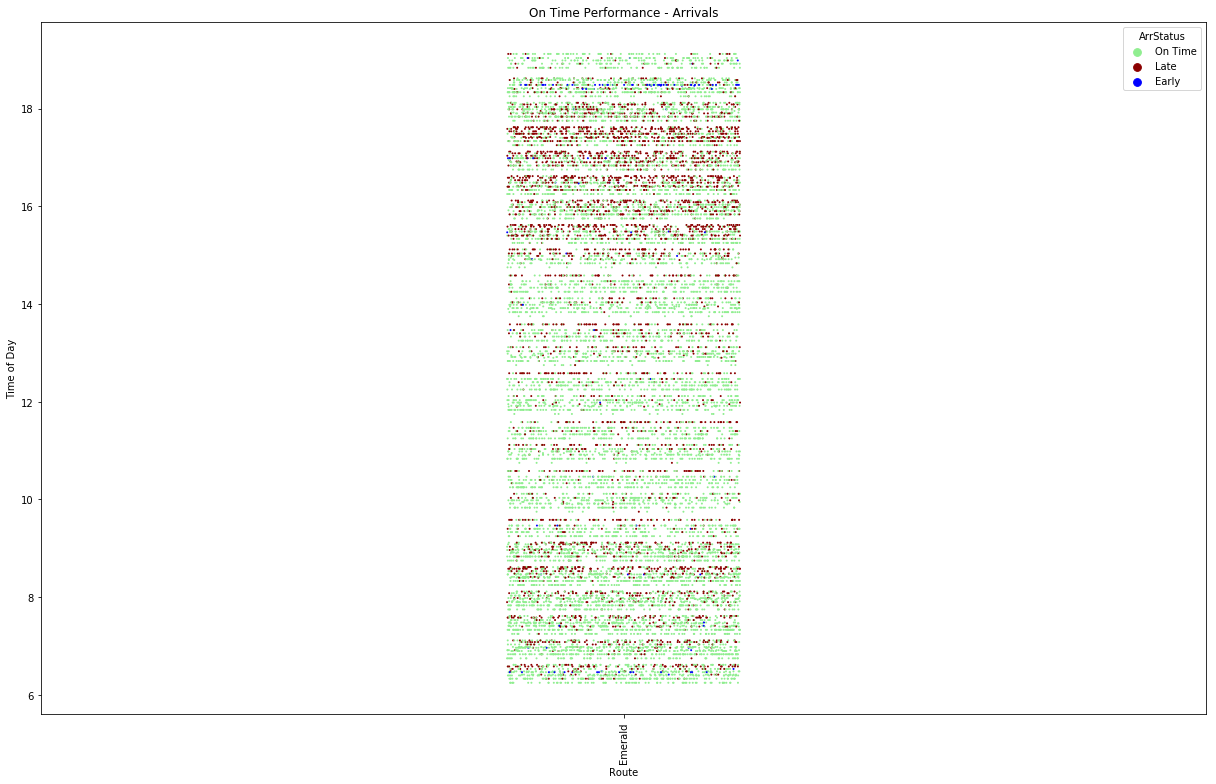

In [14]:
f, ax = plt.subplots(figsize=(17,11))
ax=sns.stripplot(x=OTP_data.MasterRouteName,y=OTP_data.ToDdec,size=2,hue=OTP_data.ArrStatus,palette={'Early':'blue','On Time':'lightgreen','Late':'darkred'})
plt.xticks(rotation=90)
plt.xlabel("Route")
plt.ylabel("Time of Day")
plt.title("On Time Performance - Arrivals")
plt.tight_layout()

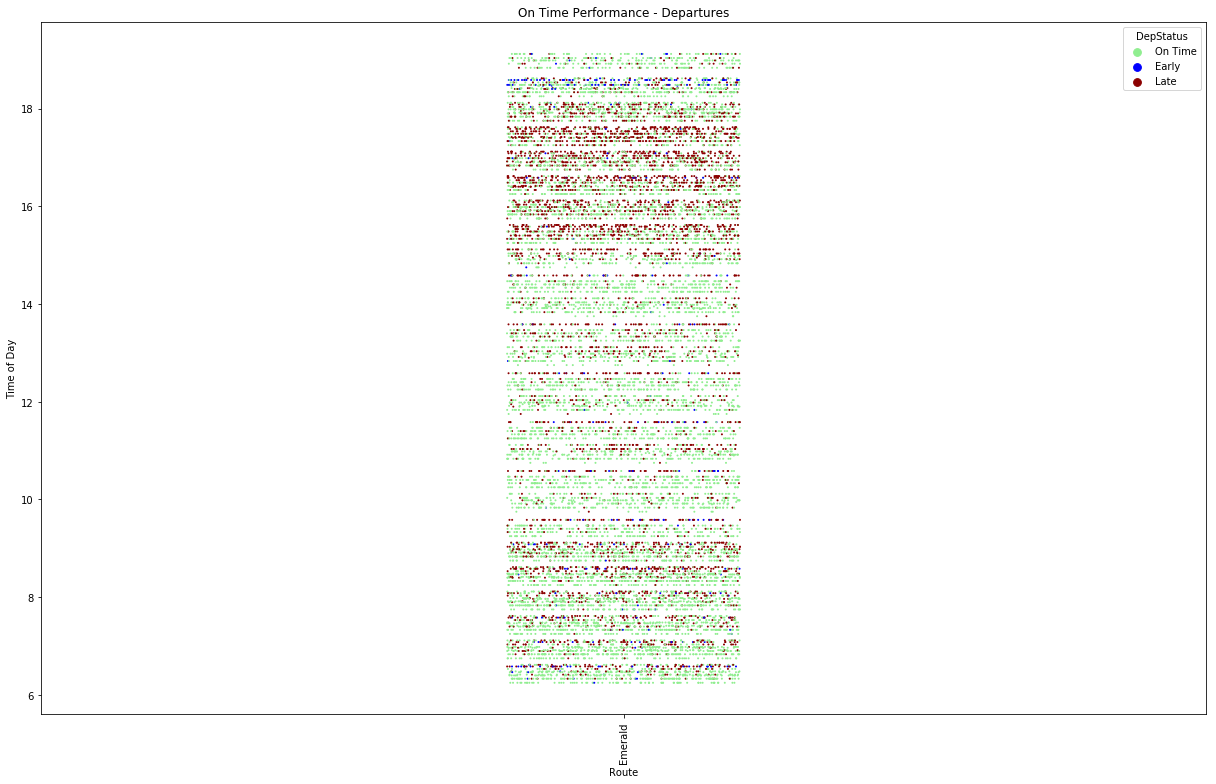

In [15]:
f, ax = plt.subplots(figsize=(17,11))
ax=sns.stripplot(x=OTP_data.MasterRouteName,y=OTP_data.ToDdec,size=2,hue=OTP_data.DepStatus,palette={'Early':'blue','On Time':'lightgreen','Late':'darkred'})
plt.xticks(rotation=90)
plt.xlabel("Route")
plt.ylabel("Time of Day")
plt.title("On Time Performance - Departures")
plt.tight_layout()

In [16]:
OTP_data['Hold']=False
OTP_data.loc[np.logical_and(OTP_data.ArrStatus=='Early',OTP_data.DepStatus=='On Time'),'Hold']='Early to On Time'
# OTP_data['Hold'][(OTP_data['ArrStatus']=='Early') & (OTP_data['DepStatus']=='On Time')]='Early to On Time'
OTP_data.loc[np.logical_and(OTP_data.ArrStatus=='Early',OTP_data.DepStatus=='Early'),'Hold']='Early to Early'
# OTP_data['Hold'][(OTP_data['ArrStatus']=='Early') & (OTP_data['DepStatus']=='Early')]='Early to Early'
OTP_data.loc[np.logical_and(OTP_data.RelArrNum<-1,OTP_data.DepStatus=='Late'),'Hold']='Early to Late'
# OTP_data['Hold'][(OTP_data['RelArrNum']<-1) & (OTP_data['DepStatus']=='Late')]='Early to Late'
holds=OTP_data[OTP_data.Hold!=False]

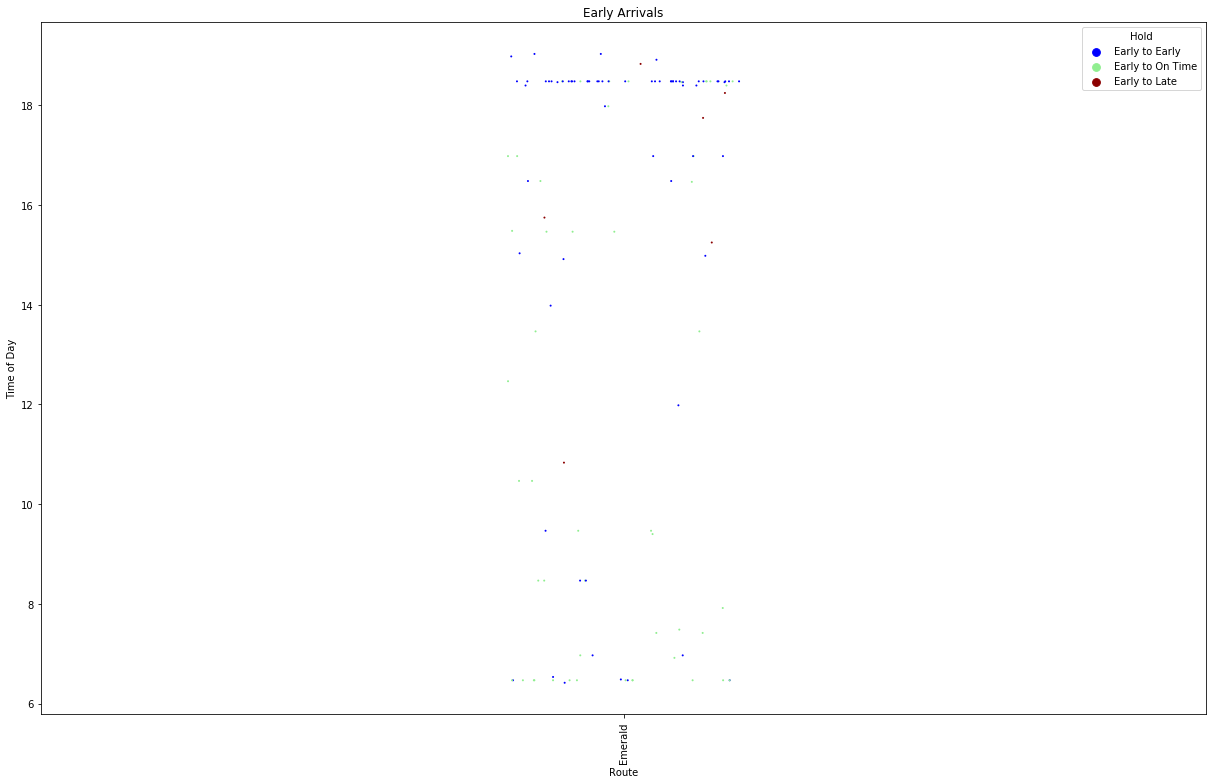

In [17]:
f, ax = plt.subplots(figsize=(17,11))
ax=sns.stripplot(x=holds.MasterRouteName,y=holds.ToDdec,size=2,hue=holds.Hold,palette={'Early to On Time':'lightgreen','Early to Early':'blue','Early to Late':'darkred'})
plt.xticks(rotation=90)
plt.xlabel("Route")
plt.ylabel("Time of Day")
plt.title("Early Arrivals")
plt.tight_layout()

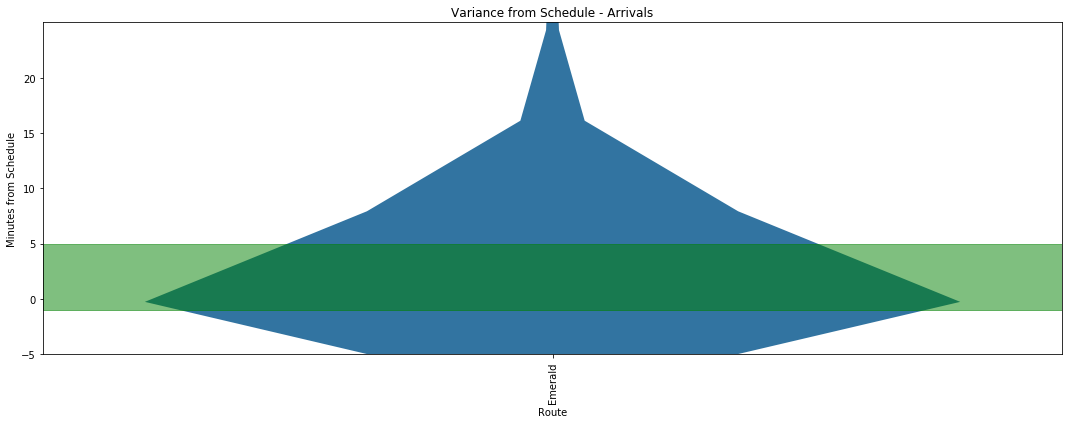

In [18]:
f, ax = plt.subplots(figsize=(15,6))
plt.axhspan(-1,5,color='green',alpha=.5)
violin=sns.violinplot(x=OTP_data.MasterRouteName,y=OTP_data.RelArrNum,ax=ax,scale="width",linewidth=0)
plt.xticks(rotation=90)
plt.yticks(np.arange(-5, 25, step=5))
plt.ylim(-5,25)
plt.ylabel("Minutes from Schedule")
plt.xlabel("Route")
plt.title("Variance from Schedule - Arrivals")
plt.tight_layout()

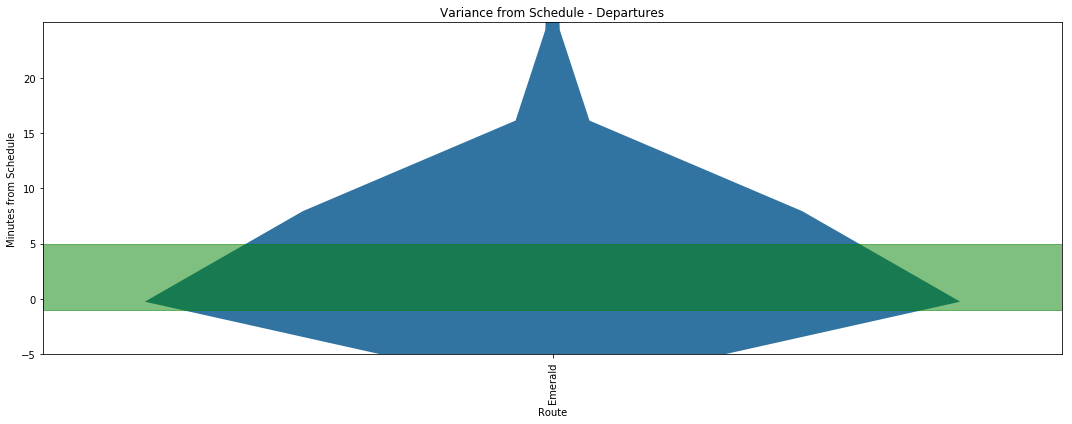

In [19]:
f, ax = plt.subplots(figsize=(15,6))
violin=sns.violinplot(x=OTP_data.MasterRouteName,y=OTP_data.RelDepNum,ax=ax,scale="width",linewidth=0)
plt.xticks(rotation=90)
plt.yticks(np.arange(-5, 25, step=5))
plt.ylim(-5,25)
plt.ylabel("Minutes from Schedule")
plt.xlabel("Route")
plt.title("Variance from Schedule - Departures")
plt.axhspan(-1,5,color='green',alpha=.5)
plt.tight_layout()

In [20]:
routeOTP=OTP_data.groupby(['MasterRouteName','ArrStatus','DepStatus'])
routeOTP=pd.DataFrame(routeOTP.size(),columns=['Count'])
routeOTP['Perc']=routeOTP.groupby(level=0).apply(lambda x: 100*x/x.sum())
with pd.option_context('display.max_rows',None):
    print(routeOTP)

                                     Count       Perc
MasterRouteName ArrStatus DepStatus                  
Emerald         Early     Early         66   0.431598
                          On Time       50   0.326968
                Late      Late        3900  25.503531
                On Time   Early        282   1.844101
                          Late         699   4.571018
                          On Time    10295  67.322783


In [21]:
def Quantiler(RouteName,Stop):
    global Stop_Quantiles
    Stop_Quantiles=pd.DataFrame({'Route':[],
                             'StopName':[],
                             'ScheduledStopTime':[],
                             'Min':[],
                             'TenPercentQuant':[],
                             'TwentyFivePercentQuant':[],
                             'FiftyPercentQuant':[],
                             'SeventyFivePercentQuant':[],
                             'NinetyPercentQuant':[],
                             'Max':[],
                                'Range':[],
                                'Mid80':[]})
    cols=['Route','StopName','ScheduledStopTime','Min','TenPercentQuant','TwentyFivePercentQuant','FiftyPercentQuant','SeventyFivePercentQuant','NinetyPercentQuant','Max','Range','Mid80']
    route=OTP_data.loc[OTP_data['MasterRouteName']==RouteName]
    route=route.sort_values(['ScheduledTripStart','StopOrder'])
    route['TravelTime']=route.DepartTime.diff()
    route.loc[route.ScheduledTripStart!=route.ScheduledTripStart.shift(1),'TravelTime']=None
    route['TravelDec']=(route.TravelTime.dt.total_seconds())/60
    route.loc[route.TravelDec<=0,'TravelDec']=None
    route.loc[route.TravelDec>100,'TravelDec']=None
    route_stop=route.loc[route['StopName']==Stop]
    route_stop.dropna(subset=['TravelDec'],inplace=True)
    for i in route_stop['time'].unique():
        time=route_stop.loc[route_stop['time']==i]
#         print(len(time))
        Route=time['MasterRouteName'].iloc[0]
        StopName=time['StopName'].iloc[0]
        ScheduledStopTime=i
        Min=time['TravelDec'].min()
        TenPercentQuant=time['TravelDec'].quantile(q=.1)
        TwentyFivePercentQuant=time['TravelDec'].quantile(q=.25)
        FiftyPercentQuant=time['TravelDec'].quantile(q=.5)
        SeventyFivePercentQuant=time['TravelDec'].quantile(q=.75)
        NinetyPercentQuant=time['TravelDec'].quantile(q=.9)
        Max=time['TravelDec'].max()
        Range=Max-Min
        Mid80=NinetyPercentQuant-TenPercentQuant
        time_Quantiles=pd.DataFrame({'Route':[Route],
                                     'StopName':[StopName],
                                     'ScheduledStopTime':[ScheduledStopTime],
                                     'Min':[round(Min,1)],
                                     'TenPercentQuant':[round(TenPercentQuant,1)],
                                     'TwentyFivePercentQuant':[round(TwentyFivePercentQuant,1)],
                                     'FiftyPercentQuant':[round(FiftyPercentQuant,1)],
                                     'SeventyFivePercentQuant':[round(SeventyFivePercentQuant,1)],
                                     'NinetyPercentQuant':[round(NinetyPercentQuant,1)],
                                     'Max':[round(Max,1)],
                                     'Range':[round(Range,1)],
                                     'Mid80':[round(Mid80,1)]
                                    })
        Stop_Quantiles=Stop_Quantiles.append(time_Quantiles)
    Stop_Quantiles=Stop_Quantiles[cols]
    Stop_Quantiles.sort_values('ScheduledStopTime',inplace=True)

In [22]:
def timePlotter(RouteName,Stop):
    route=OTP_data.loc[OTP_data['MasterRouteName']==RouteName]
    route=route.sort_values(['ScheduledTripStart','StopOrder'])
    route['TravelTime']=route.DepartTime.diff()
    route.loc[route.ScheduledTripStart!=route.ScheduledTripStart.shift(1),'TravelTime']=None
    route['TravelDec']=(route.TravelTime.dt.total_seconds())/60
    route.loc[route.TravelDec<=0,'TravelDec']=None
    route.loc[route.TravelDec>100,'TravelDec']=None
    route_stop=route.loc[route['StopName']==Stop]
    route_stop.dropna(subset=['TravelDec'],inplace=True)
    f, ax = plt.subplots(figsize=(15,6))
    ax=sns.violinplot(x=route_stop.time,y=route_stop.TravelDec,inner='quartile')
    ax.grid()
    ax.set_ylim(route_stop['TravelDec'].min(),route_stop['TravelDec'].max())
    ax.set_title(route_stop['MasterRouteName'].iloc[0]+': '+route_stop['StopName'].iloc[0])
    ax.set(xlabel=None,ylabel='Travel Time')
    plt.xticks(rotation='vertical')
    plt.tight_layout()

In [40]:
routeName='Emerald'
stopName='River & 13th NWC'

c:\users\bparker\appdata\local\conda\conda\envs\py3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


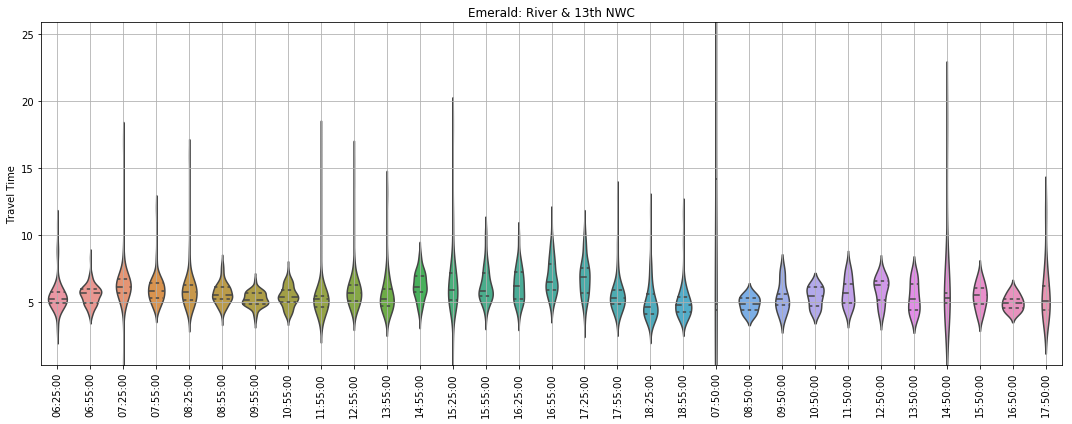

In [41]:
timePlotter(routeName,stopName)

In [42]:
Quantiler(routeName,stopName)

c:\users\bparker\appdata\local\conda\conda\envs\py3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [43]:
Stop_Quantiles

,Route,StopName,ScheduledStopTime,Min,TenPercentQuant,TwentyFivePercentQuant,FiftyPercentQuant,SeventyFivePercentQuant,NinetyPercentQuant,Max,Range,Mid80
0,Emerald,River & 13th NWC,06:25:00,3.0,4.6,5.0,5.3,5.8,6.3,10.8,7.8,1.7
0,Emerald,River & 13th NWC,06:55:00,4.1,4.8,5.0,5.7,6.0,6.4,8.3,4.2,1.6
0,Emerald,River & 13th NWC,07:25:00,0.3,5.0,5.7,6.2,6.7,7.0,17.0,16.7,2.0
0,Emerald,River & 13th NWC,07:50:00,2.8,3.7,4.5,4.9,14.2,23.6,25.9,23.1,20.0
0,Emerald,River & 13th NWC,07:55:00,4.4,4.8,5.3,5.9,6.4,7.0,12.1,7.6,2.2
0,Emerald,River & 13th NWC,08:25:00,4.1,4.7,5.2,5.8,6.3,6.9,15.9,11.9,2.2
0,Emerald,River & 13th NWC,08:50:00,4.1,4.1,4.5,4.9,5.3,5.5,5.7,1.6,1.4
0,Emerald,River & 13th NWC,08:55:00,4.0,4.8,5.2,5.5,6.1,6.5,7.9,3.9,1.8
0,Emerald,River & 13th NWC,09:50:00,4.2,4.3,4.8,5.3,5.6,7.1,7.2,3.0,2.8
0,Emerald,River & 13th NWC,09:55:00,3.6,4.7,4.9,5.2,5.7,5.9,6.7,3.1,1.3


In [ ]:
# Stop_Quantiles.to_excel(r"N:\Planning - New File Structure\Short Range Planning\Service Changes\2018\Post Change Schedules\40 Nampa Meridian Express\Overland_BlackMarlin_NWC_Quantiles.xlsx")